In [79]:
import csv
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [80]:
all_drivers = []

with open('drivers_1961-2019.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        all_drivers.append((row["Driver"], row["Car"], row["Year"]))

In [81]:
connections = []

for i, j in itertools.product(range(len(all_drivers)), range(len(all_drivers))):
        if (all_drivers[i][1] == all_drivers[j][1]) and (all_drivers[i][2] == all_drivers[j][2]) and (all_drivers[i][0] != all_drivers[j][0]):
            connections.append((all_drivers[i], all_drivers[j]))

In [82]:
connections_to_plot = []

for i in range(len(connections)):
    connections_to_plot.append(((connections[i][0][0], connections[i][1][0])))

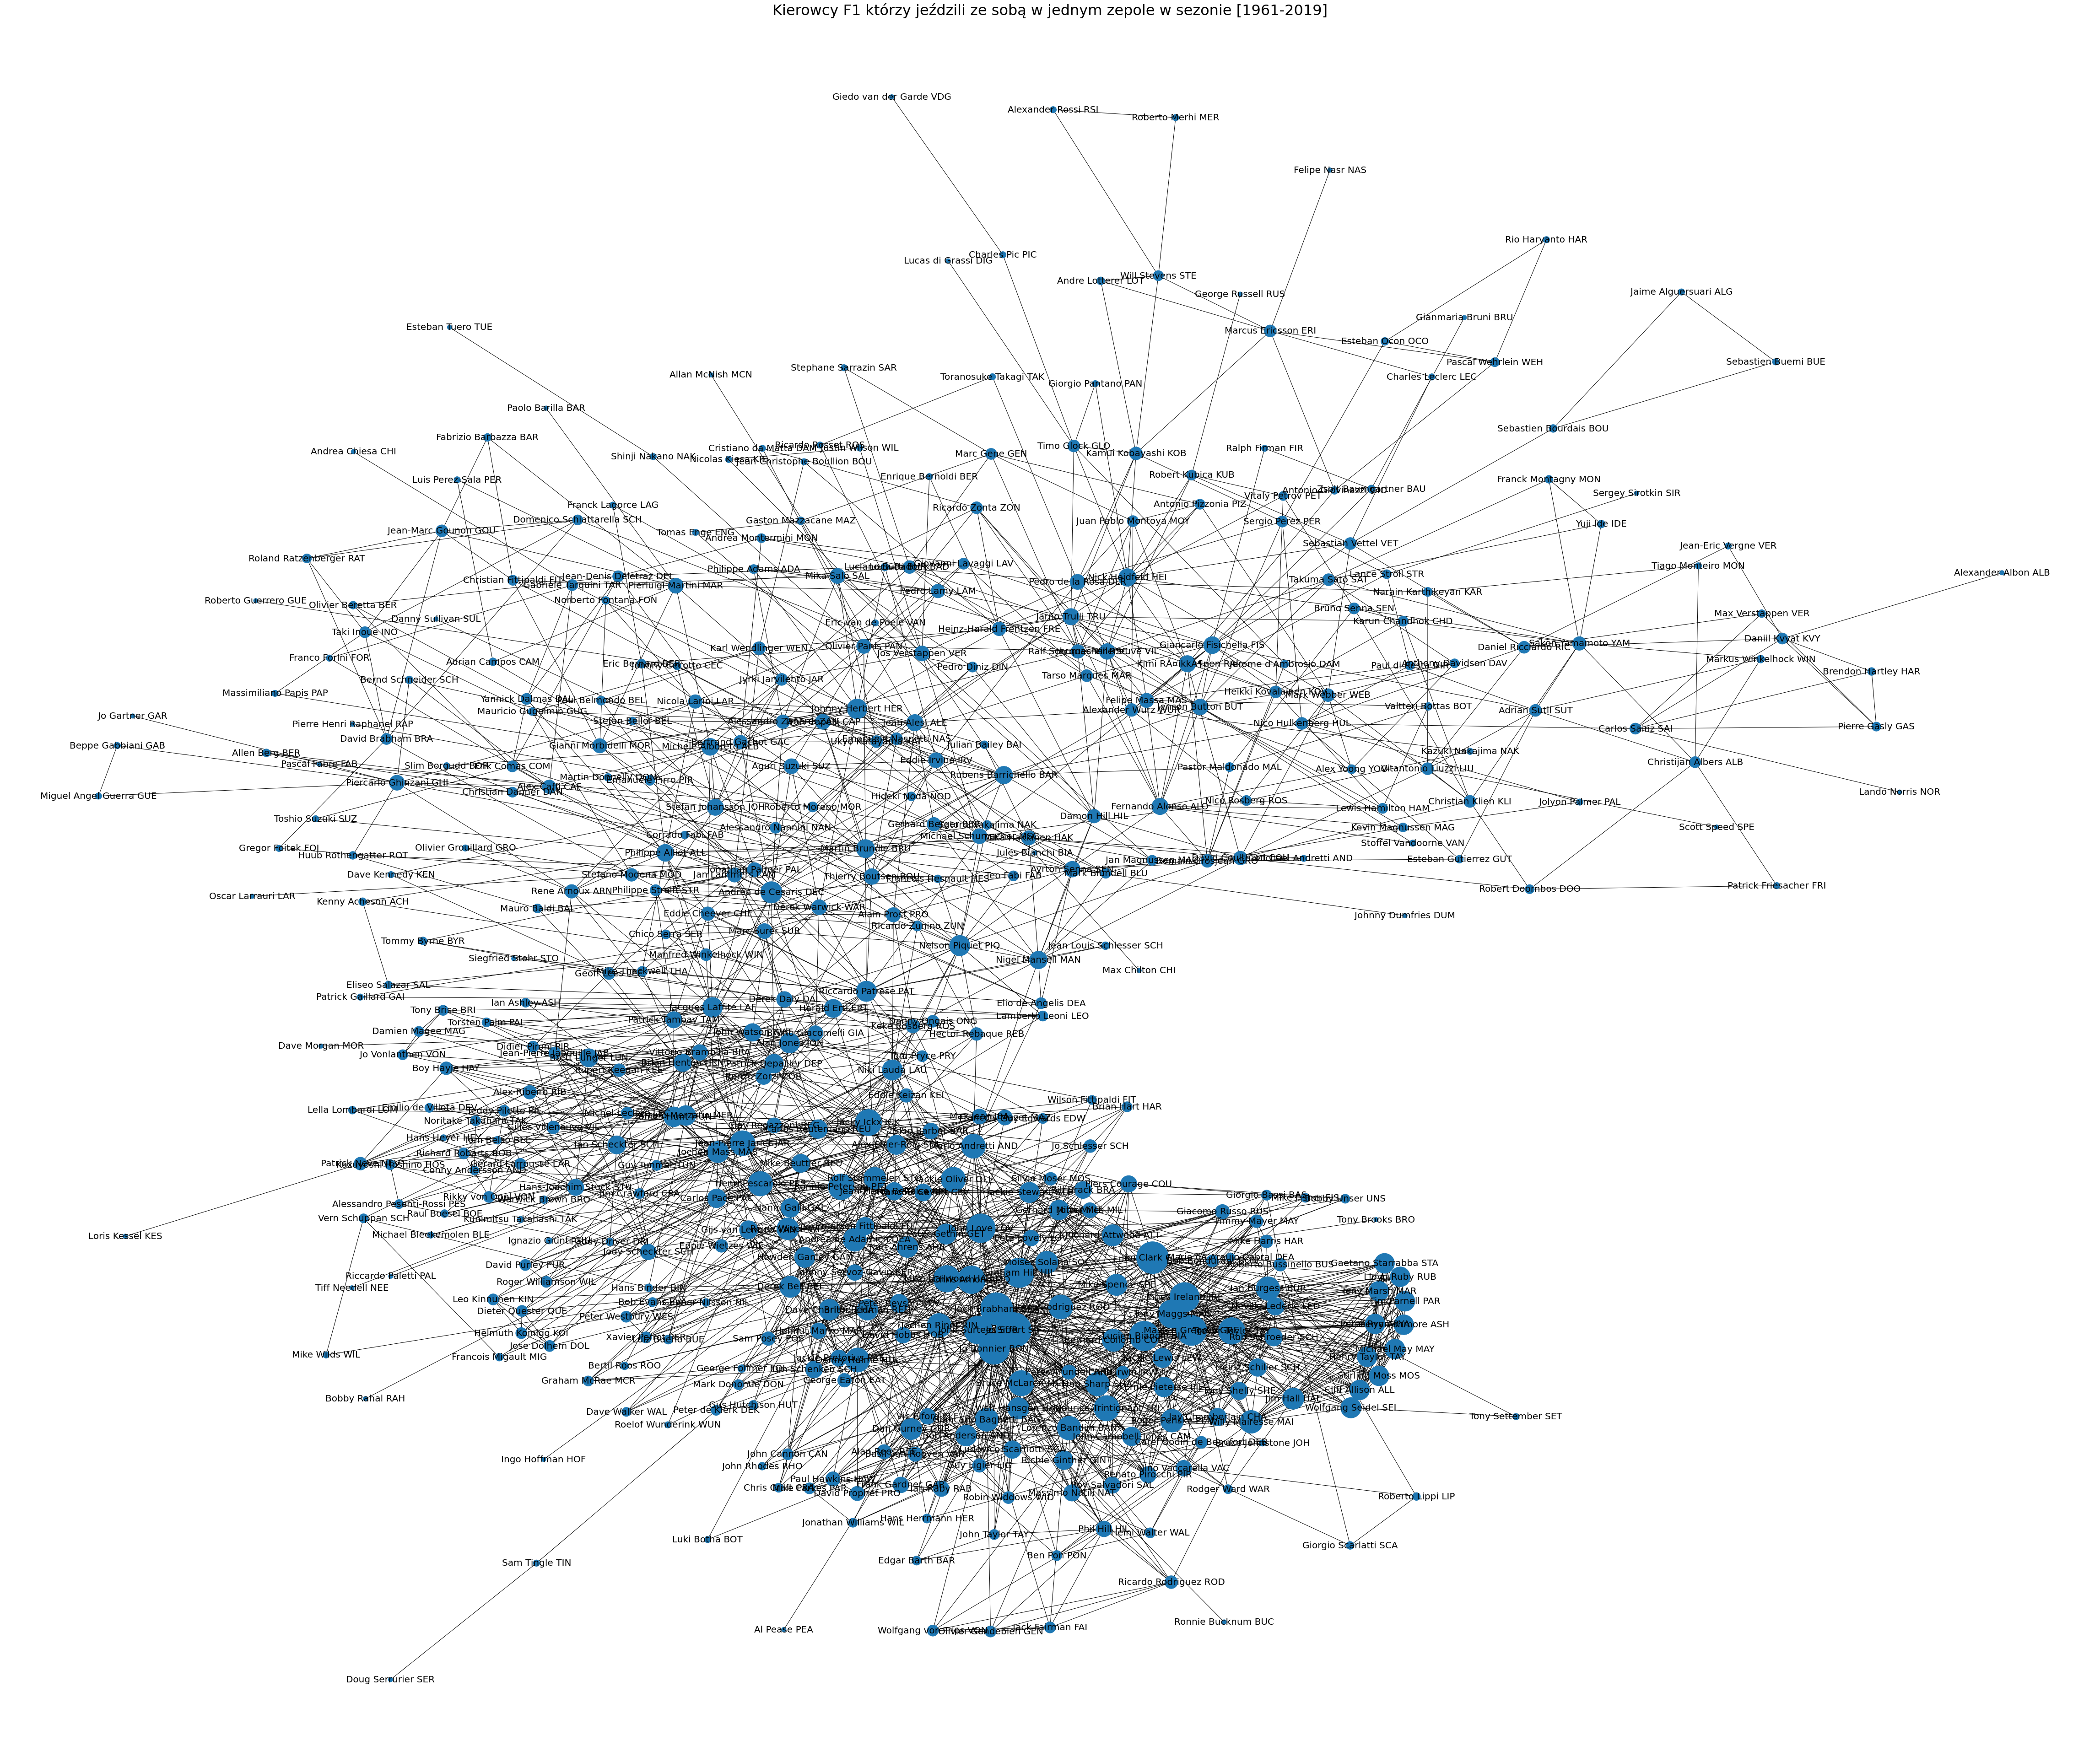

In [83]:
G = nx.Graph()
G.add_edges_from(connections_to_plot)
d = dict(G.degree)
plt.figure(figsize=(82, 70))
plt.title('Kierowcy F1 którzy jeździli ze sobą w jednym zepole w sezonie [1961-2019]', loc='center',
       fontsize=32)
nx.draw_kamada_kawai(G, with_labels=True, font_size=20, node_size=[v * 100 for v in d.values()])
plt.show()

In [84]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 465
Number of edges: 2220
Average degree:   9.5484


In [85]:
print(nx.number_connected_components(G))
komponenty_sieci = (list(nx.connected_components(G)))
print(komponenty_sieci[1])

2
{'Jules Bianchi BIA', 'Max Chilton CHI'}


In [86]:
G.remove_node('Jules Bianchi BIA')
G.remove_node('Max Chilton CHI')

In [87]:
nx.average_shortest_path_length(G)

4.12634521705796

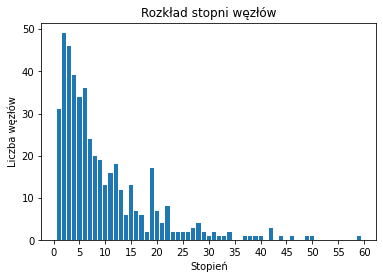

In [88]:
degree_sequence = sorted((d for n, d in G.degree()))
fig, ax = plt.subplots()
ax.bar(*np.unique(degree_sequence, return_counts=True))
ax.set_title("Rozkład stopni węzłów")
ax.set_xlabel("Stopień")
ax.set_ylabel("Liczba węzłów")
plt.xticks([*range(0, 65, 5)])
plt.show()

Dodatkowa funkcja do ścieżek między kierowcami

In [89]:
print(nx.shortest_path_length(G, source='Charles Leclerc LEC', target='Wolfgang von Trips VON'))
print(nx.shortest_path(G, source='Charles Leclerc LEC', target='Wolfgang von Trips VON'))

def shortest_drivers_path(graph, driver1, driver2):
    teammates = (nx.shortest_path(graph, source=driver1, target=driver2))
    number_of_teamates_b = ((len(nx.shortest_path(graph, source=driver1, target=driver2)))-2)
    print(f"\nThere is {number_of_teamates_b} drivers between '{driver1}' and '{driver2}':")
    print(teammates[1:-1])
              
shortest_drivers_path(G, 'Jim Clark CLA', 'Max Verstappen VER')

8
['Charles Leclerc LEC', 'Sebastian Vettel VET', 'Kimi RĂ¤ikkĂ¶nen RAI', 'Fernando Alonso ALO', 'Nelson Piquet PIQ', 'Jacky Ickx ICK', 'Chris Amon AMO', 'Richie Ginther GIN', 'Wolfgang von Trips VON']

There is 5 drivers between 'Jim Clark CLA' and 'Max Verstappen VER':
['Mario Andretti AND', 'Nigel Mansell MAN', 'David Coulthard COU', 'Vitantonio Liuzzi LIU', 'Daniel Ricciardo RIC']
